#### Name: Mohamed Elmoudni
#### Class: Machine Learning and Big Data DATA 622
#### Week 15 - Tuning your model
#### Assignment: W15 Project


###### W15 Project

Incorporate all lessons to improve the performance of the classification using the raw dataset. Submit source code and error measures.



#### Tuning steps:





To improve the classification, I will be looking to tune two major areas:
    
    1-    The Data 
    2-    The Algorithm.  

To improve data I will be looking at the following areas: 
    
    Rescale the data. 
    Transform the data.
    
To improve the algorithm, I will be looking at tuning the below areas by Grid-Searching the hyper parameters when applicable:
    
1- Diagnostics: Is the model overfitting or under fitting?
    
2- Learning Rate: I will experiment with very small learning rates and large rates. I will try adding momentum term; then change the learning rate.
    
3- Activation Functions: I will be experimenting using the different activation function sigmoid,tanh, relu, then a softmax, linear or sigmoid on the output layer
    
4- Network Topology: I will be changing the network topology by using different number of layers and neurons
    
5- Batches and Epochs: The batch size defines the gradient and how often to update weights. An epoch is the entire training data exposed to the network, batch-by-batch. I will be experimenting running small batch sizes with large epoch size.
    
6- Regularization: regularization is a great approach to curb overfitting the training data. I will be using the dropout regularization technique. Dropout randomly skips neurons during training, forcing others in the layer to pick up the slack. I will be experimenting with dropout in the input, hidden, and output layers.
    
7- Optimization and Loss: There are many optimization methods that offer more parameters, more complexity and faster convergence. However, for our classification problem, we will be mainly experimenting with the followings: adam and RMSprop
        





##### For the above tuning steps, I will be using three models as follow: 

In [135]:
import csv
import os
import time
from scipy import misc

import pandas as pd

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.cross_validation import train_test_split
from PIL import Image
from StringIO import StringIO
import requests
import numpy as np
import requests
##
import numpy
#K.set_image_dim_ordering('th')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10) # Make the figures a bit bigger
from keras.preprocessing.image import ImageDataGenerator
##
# image proccesssing 
import PIL
from PIL import Image
from StringIO import StringIO
import requests
from resizeimage import resizeimage

import keras.callbacks as cb
import keras.utils.np_utils as np_utils
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D, ZeroPadding2D
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [136]:
#####################################################################################
 # Load the CSV meta data
######################################################################################


def load_face_data(csvdata, total, basewidth): 
    # initial our array 28x28 image size 
    X_data = np.zeros([total, basewidth, basewidth])
    Y_data = np.zeros([total, 1], dtype=np.int8)
    df = []
    csvdf= (csvdata[['image', 'emotion']]).head(total)
    #print csvdf['image'][0]
    for i in range(0,total-1):
        img9 = 'https://raw.githubusercontent.com/muxspace/facial_expressions/master/images/'+csvdf['image'][i]
        #print(img9)
        r = requests.get(img9)
        im = Image.open(StringIO(r.content))
        wpercent = (basewidth / float(im.size[0]))
        hsize = int((float(im.size[1]) * float(wpercent)))
        im = im.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
        #im = resizeimage.resize_crop(im, [basewidth, basewidth])
        image = img_to_array(im)
        #df = np.asarray([image,csvdf['emotion']])
        df = ([image,csvdf['emotion']])
        X_data[i] = np.asarray(image)
        if  (df[1][i]).strip().lower()== 'happiness': 
            Y_data[i] =1
        if  (df[1][i]).strip().lower()== 'anger': 
            Y_data[i] =2
        if  (df[1][i]).strip().lower()== 'disgust': 
            Y_data[i] =3
        if  (df[1][i]).strip().lower()== 'fear': 
            Y_data[i] =4
        if  (df[1][i]).strip().lower()== 'neutral': 
            Y_data[i] =5
        if  (df[1][i]).strip().lower()== 'sadness': 
            Y_data[i] =6
        if  (df[1][i]).strip().lower()== 'surprise': 
            Y_data[i] =7
        if  (df[1][i]).strip().lower()== 'contempt': 
            Y_data[i] =8
    return X_data, Y_data  

##########

csvdata = pd.read_csv('https://raw.githubusercontent.com/muxspace/facial_expressions/master/data/legend.csv', 
                  skiprows=range(1, 5))

total = len(csvdata)
basewidth = 28
total =2000
X_data, Y_data = load_face_data(csvdata, total, basewidth)
print (Y_data.shape)
print (X_data.shape)

(2000, 1)
(2000, 28, 28)


In [137]:
trainNdx = int(100 * .8)
X_train, X_test = np.split(X_data, [trainNdx])
y_train, y_test = np.split(Y_data, [trainNdx])

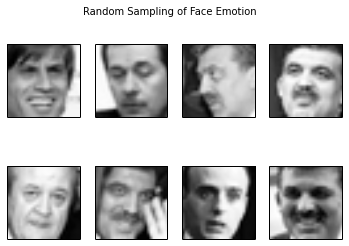

In [139]:
%matplotlib inline
import struct
from numpy import *
from matplotlib.pyplot import *

# Get the figure and axes.
fig, axes = subplots(2, 4)
axes = axes.reshape(8)
fig.suptitle("Random Sampling of Face Emotion")

# Plot random images.
indices = random.randint(len(X_train), size=8)
for axis, index in zip(axes, indices):
    image = X_train[index, :, :]
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    axis.imshow(image,cmap = cm.Greys_r)

In [7]:
X_data = X_data.astype('float32')
#X_data /= 255.0

##################
trainNdx = int(total * .8)
X_train, X_test = np.split(X_data, [trainNdx])
y_train, y_test = np.split(Y_data, [trainNdx])
#########################

##############
X_test = X_test.reshape(X_test.shape[0], 1, basewidth , basewidth )
X_train = X_train.reshape(X_train.shape[0], 1, basewidth , basewidth )
###########################

# reshape to be [samples][pixels][width][height]
#X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
#X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
nb_classes = np.max(y_train)+2
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


################

##### 1. Construct a neural network: baseline model model_1

The major components of our initial CNN model can be summarized as follows:

1- The first hidden layer is a convolutional layer called a Convolution2D. 
   The layer has 15 feature maps, which with the size of 5x5 and a rectifier activation function.
    

2- Next we define a pooling layer that takes the maximum value called MaxPooling2D. 
   It is configured with a pool size of 2 x2.
    

3- The next layer is a regularization layer using dropout called Dropout. 
   It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
    

4- Next is a layer that converts the 2D matrix data to a vector called Flatten. 
   It allows the output to be processed by standard fully connected layers.
    

5- Next a fully connected layer with 10 neurons and rectifier activation function is used.


5- Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

In addition we set the "adam" optimizer with learning rate of 0.1


In [ ]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    # create model
    model = Sequential()
    model.add(Convolution2D(15, 5, 5, input_shape=(1, basewidth , basewidth ), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(nb_classes, activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [8]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
#dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X, Y = X_train, y_train 
#X = dataset[:,0:8]
#Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = numpy.array([10, 20, 32])
batches = numpy.array([8, 16, 32])
param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, init = init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Best: 0.795625 using {'init': 'normal', 'optimizer': 'adam', 'nb_epoch': 32, 'batch_size': 16}
0.685564 (0.134541) with: {'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'nb_epoch': 10, 'batch_size': 8}
0.771249 (0.005575) with: {'init': 'glorot_uniform', 'optimizer': 'adam', 'nb_epoch': 10, 'batch_size': 8}
0.763134 (0.014076) with: {'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'nb_epoch': 20, 'batch_size': 8}
0.784390 (0.017052) with: {'init': 'glorot_uniform', 'optimizer': 'adam', 'nb_epoch': 20, 'batch_size': 8}
0.781892 (0.019782) with: {'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'nb_epoch': 32, 'batch_size': 8}
0.773151 (0.029946) with: {'init': 'glorot_uniform', 'optimizer': 'adam', 'nb_epoch': 32, 'batch_size': 8}
0.751905 (0.035689) with: {'init': 'normal', 'optimizer': 'rmsprop', 'nb_epoch': 10, 'batch_size': 8}
0.786253 (0.009237) with: {'init': 'normal', 'optimizer': 'adam', 'nb_epoch': 10, 'batch_size': 8}
0.736262 (0.038433) with: {'init': 'normal', 'optimiz

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


##### 2. Second Model: model_2

The major components of our second CNN modle can be summarized as follows:
1- Convolutional layer with 15 feature maps of size 5x5.

2- Pooling layer taking the max over 2x2 patches.

3- Convolutional layer with 10 feature maps of size 3x3.

4- Pooling layer taking the max over 2x2 patches.

5- Dropout layer with a probability of 20%.

6- Flatten layer.

7- Fully connected layer with 10 neurons and rectifier activation.

8- Fully connected layer with 10 neurons and rectifier activation.

9- Fully connected layer with 100 neurons and rectifier activation.

10- Output layer.

In addition we are the "adam" optimizer with learning rate of 0.00001

In [ ]:
adam = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
###

def model_2(optimizer='rmsprop', init='glorot_uniform'):  
      #print 'Compiling Model ... '
      model = Sequential()
      model.add(Convolution2D(15, 5, 5, input_shape=(1, basewidth, basewidth), activation='relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Convolution2D(10, 3, 3, activation='relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      #model.add(Convolution2D(20, 3, 3, activation='relu'))
      #model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(0.2))
      model.add(Flatten())
      model.add(Dense(10, activation='relu'))
      model.add(Dense(10, activation='relu'))
      model.add(Dense(100, activation='relu'))
      model.add(Dense(nb_classes, activation='softmax'))
      # Compile model
      model.compile(loss='sparse_categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
      return model

########

In [9]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
#dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X, Y = X_train, y_train 
#X = dataset[:,0:8]
#Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=model_2, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = numpy.array([10, 20, 32])
batches = numpy.array([8, 16, 32])
param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, init = init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.785625 using {'init': 'normal', 'optimizer': 'adam', 'nb_epoch': 32, 'batch_size': 8}
0.557427 (0.083446) with: {'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'nb_epoch': 10, 'batch_size': 8}
0.606938 (0.092797) with: {'init': 'glorot_uniform', 'optimizer': 'adam', 'nb_epoch': 10, 'batch_size': 8}
0.773126 (0.019182) with: {'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'nb_epoch': 20, 'batch_size': 8}
0.684960 (0.076219) with: {'init': 'glorot_uniform', 'optimizer': 'adam', 'nb_epoch': 20, 'batch_size': 8}
0.766880 (0.019330) with: {'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'nb_epoch': 32, 'batch_size': 8}
0.696203 (0.119734) with: {'init': 'glorot_uniform', 'optimizer': 'adam', 'nb_epoch': 32, 'batch_size': 8}
0.542529 (0.055793) with: {'init': 'normal', 'optimizer': 'rmsprop', 'nb_epoch': 10, 'batch_size': 8}
0.570753 (0.157757) with: {'init': 'normal', 'optimizer': 'adam', 'nb_epoch': 10, 'batch_size': 8}
0.703834 (0.095138) with: {'init': 'normal', 'optimize

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


##### 3. Third Model: model_3

The major components of our second CNN modle can be summarized as follows:
1- Convolutional layer with 30feature maps of size 5x5.

2- Pooling layer taking the max over 2x2 patches.

3- Convolutional layer with 50 feature maps of size 5x5.

4- Pooling layer taking the max over 2x2 patches.

5- Convolutional layer with 50 feature maps of size 5x5.

6- Pooling layer taking the max over 2x2 patches.

5- Dropout layer with a probability of 20%.

7- Flatten layer.

8- Fully connected layer with 10 neurons and rectifier activation.

9- Fully connected layer with 10 neurons and rectifier activation.

10- Output layer.

In addition we set the "adam" optimizer with learning rate of 0.00001. Please note that difference between
the second model and third model is that we added an additional convolutional hidden layer. 

In [ ]:
def model_3(optimizer='rmsprop', init='glorot_uniform'):
    # initialize the model
    model = Sequential()
    # first set of CONV => RELU => POOL
    model.add(Convolution2D(30, 5, 5, border_mode="same",
               input_shape=(1, basewidth, basewidth)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # second set of CONV => RELU => POOL
    model.add(Convolution2D(50, 5, 5, border_mode="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # Third set of CONV => RELU => POOL
    model.add(Convolution2D(50, 5, 5, border_mode="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # set of FC => RELU layers
    model.add(Dropout(0.2))
    #model.add(Flatten())
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation("relu"))
    # softmax classifier
    model.add(Dense(nb_classes))
    model.add(Activation("relu"))
    # if a weights path is supplied (inicating that the model was
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # return the constructed network architecture
    return model

########

In [10]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
#dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X, Y = X_train, y_train 
#X = dataset[:,0:8]
#Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=model_3, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = numpy.array([10, 20, 32])
batches = numpy.array([8, 16, 32])
param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, init = init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.741875 using {'init': 'glorot_uniform', 'optimizer': 'adam', 'nb_epoch': 32, 'batch_size': 16}
0.616264 (0.118277) with: {'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'nb_epoch': 10, 'batch_size': 8}
0.609385 (0.088025) with: {'init': 'glorot_uniform', 'optimizer': 'adam', 'nb_epoch': 10, 'batch_size': 8}
0.453188 (0.073295) with: {'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'nb_epoch': 20, 'batch_size': 8}
0.741249 (0.007066) with: {'init': 'glorot_uniform', 'optimizer': 'adam', 'nb_epoch': 20, 'batch_size': 8}
0.625020 (0.143427) with: {'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'nb_epoch': 32, 'batch_size': 8}
0.536365 (0.162167) with: {'init': 'glorot_uniform', 'optimizer': 'adam', 'nb_epoch': 32, 'batch_size': 8}
0.565495 (0.148162) with: {'init': 'normal', 'optimizer': 'rmsprop', 'nb_epoch': 10, 'batch_size': 8}
0.633132 (0.105244) with: {'init': 'normal', 'optimizer': 'adam', 'nb_epoch': 10, 'batch_size': 8}
0.553679 (0.080610) with: {'init': 'normal', 

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


#### Results:

Using grid search for epochs, batch size, and optimizer as per below: 
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = numpy.array([10, 20, 32])
batches = numpy.array([8, 16, 32])

The best hyper parameters for the three models are as follow: 

Model 1: 
Best: 0.795625 using {'init': 'normal', 'optimizer': 'adam', 'nb_epoch': 32, 'batch_size': 16}

Model 2: 
Best: 0.785625 using {'init': 'normal', 'optimizer': 'adam', 'nb_epoch': 32, 'batch_size': 8}


Model 3: 
Best: 0.741875 using {'init': 'glorot_uniform', 'optimizer': 'adam', 'nb_epoch': 32, 'batch_size': 16}

As per above results, I will select model 1 and apply my augmentation steps.   

        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=True,  # set each sample mean to 0
        featurewise_std_normalization=True)  # divide inputs by std of the dataset
        samplewise_std_normalization=True,  # divide each input by its std
        zca_whitening=True)  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


##### Augmentation starts here 



In [118]:
def create_model(optimizer='adam', init='normal'):
    # create model
    model = Sequential()
    model.add(Convolution2D(15, 5, 5, input_shape=(1, basewidth , basewidth ), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(nb_classes, activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = create_model()
#datagen = ImageDataGenerator(featurewise_center= True, 
#                                  featurewise_std_normalization= True)

datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=True,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=True,  # divide each input by its std
        zca_whitening=True,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

####  trains the neural network using the transformed images;
#np.expand_dims(Y_train, -1)
# fits the model on batches with real-time data augmentation:
#{'init': 'normal', 'optimizer': 'adam', 'nb_epoch': 32, 'batch_size': 16}
model.fit_generator(datagen.flow(X_train, y_train, batch_size=16),
                    samples_per_epoch=len(X_train), nb_epoch=32, verbose = 2)

# Final evaluationof the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Model 1, CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/32
2s - loss: 1.4690 - acc: 0.2900
Epoch 2/32
2s - loss: 1.1510 - acc: 0.5294
Epoch 3/32
2s - loss: 1.0606 - acc: 0.5294
Epoch 4/32
2s - loss: 1.0173 - acc: 0.5294
Epoch 5/32
2s - loss: 0.9911 - acc: 0.5294
Epoch 6/32
2s - loss: 0.9737 - acc: 0.5294
Epoch 7/32
2s - loss: 0.9614 - acc: 0.5294
Epoch 8/32
2s - loss: 0.9518 - acc: 0.5294
Epoch 9/32
2s - loss: 0.9435 - acc: 0.5294
Epoch 10/32
2s - loss: 0.9394 - acc: 0.5294
Epoch 11/32
2s - loss: 0.9344 - acc: 0.5294
Epoch 12/32
3s - loss: 0.9311 - acc: 0.5294
Epoch 13/32
2s - loss: 0.9272 - acc: 0.5294
Epoch 14/32
2s - loss: 0.9258 - acc: 0.5294
Epoch 15/32
2s - loss: 0.9256 - acc: 0.5294
Epoch 16/32
3s - loss: 0.9223 - acc: 0.5294
Epoch 17/32
4s - loss: 0.9220 - acc: 0.5294
Epoch 18/32
2s - loss: 0.9223 - acc: 0.5294
Epoch 19/32
2s - loss: 0.9218 - acc: 0.5294
Epoch 20/32
3s - loss: 0.9203 - acc: 0.5294
Epoch 21/32
5s - loss: 0.9205 - acc: 0.5294
Epoch 22/32
3s - loss: 0.9194 - acc: 0.5294
Epoch 23/32
3s - loss: 0.9189 - acc: 0.52

##### After applying augmentation the accuracy had gone down to 52.94% and the error has gone up 50.75%.
##### We need to adjust our augmentataion by normalizing our data 

In [129]:
def create_model(optimizer='adam', init='normal'):
    # create model
    model = Sequential()
    model.add(Convolution2D(15, 5, 5, input_shape=(1, basewidth , basewidth ),  activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(nb_classes, activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = create_model()

datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        #samplewise_center=True,  # set each sample mean to 0
        featurewise_std_normalization=True)  # divide inputs by std of the dataset
        #samplewise_std_normalization=True,  # divide each input by its std
        #zca_whitening=True,  # apply ZCA whitening
        #rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        #width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        #height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip=True,  # randomly flip images
        #vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

####  trains the neural network using the transformed images;
#np.expand_dims(Y_train, -1)
# fits the model on batches with real-time data augmentation:
#{'init': 'normal', 'optimizer': 'adam', 'nb_epoch': 32, 'batch_size': 16}
model.fit_generator(datagen.flow(X_train, y_train, batch_size=16),
                    samples_per_epoch=len(X_train), nb_epoch=32, verbose = 2)

# Final evaluationof the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Model 1, CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/32
1s - loss: 1.1917 - acc: 0.6181
Epoch 2/32
1s - loss: 0.8237 - acc: 0.7181
Epoch 3/32
1s - loss: 0.6776 - acc: 0.7750
Epoch 4/32
1s - loss: 0.6399 - acc: 0.7794
Epoch 5/32
1s - loss: 0.5713 - acc: 0.7906
Epoch 6/32
1s - loss: 0.5328 - acc: 0.8131
Epoch 7/32
1s - loss: 0.5061 - acc: 0.8069
Epoch 8/32
1s - loss: 0.4582 - acc: 0.8156
Epoch 9/32
1s - loss: 0.4377 - acc: 0.8325
Epoch 10/32
1s - loss: 0.4251 - acc: 0.8300
Epoch 11/32
1s - loss: 0.3884 - acc: 0.8456
Epoch 12/32
1s - loss: 0.3732 - acc: 0.8550
Epoch 13/32
1s - loss: 0.3578 - acc: 0.8563
Epoch 14/32
1s - loss: 0.3396 - acc: 0.8619
Epoch 15/32
1s - loss: 0.3219 - acc: 0.8762
Epoch 16/32
1s - loss: 0.2977 - acc: 0.8850
Epoch 17/32
1s - loss: 0.2952 - acc: 0.8787
Epoch 18/32
1s - loss: 0.2727 - acc: 0.8900
Epoch 19/32
1s - loss: 0.2589 - acc: 0.8950
Epoch 20/32
1s - loss: 0.2326 - acc: 0.9100
Epoch 21/32
1s - loss: 0.2366 - acc: 0.9131
Epoch 22/32
1s - loss: 0.2217 - acc: 0.9163
Epoch 23/32
1s - loss: 0.2053 - acc: 0.92

#### Conclusion: 

Using grid search for epochs, batch size, and optimizer as per below: 
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = numpy.array([10, 20, 32])
batches = numpy.array([8, 16, 32]) 

I selected model 1 as it has the highest accuracy of 0.795625 using {'init': 'normal', 'optimizer': 'adam', 'nb_epoch': 32, 'batch_size': 16}.  

After applying augmentation the accuracy had gone down to 52.94% and the error has gone up 50.75%. 
Then when I just use he augmentation to only normalize the data, the accuracy had gone to 95.13%  and the error had gone  down to 41%. 

Although the accuracy had gone up from 79.56% to 95.13% , I think that given enough system resources, I would probably have increased the accuracy even higher using grid search with more hyper parameters and more combinations to improve the model… Also, more data preparation would certainly improve the performance.   
